# Regresión Lineal: Predicción de Precios de Autos

Una tarea bastante común en el contexto de Machine Learning es la predicción de una variable según algunos descriptores. En esta ocasión partiremos de un dataset que involucra ocho variables (algunas numéricas, otras categóricas) y el precio de un automóvil, el cual se desea estimar empleando un modelo de regresión lineal.

El objetivo de este cuaderno es que usted aprenda:
- Algunas maneras de lidiar con descriptores categóricos no-numéricos.
- Uso de la librería Pandas para manejar datos tabulares en formato .csv.
- Uso de la librería Scikit Learn para preprocesamiento y entrenamiento de un modelo de regresión lineal.
- Funcionamiento e implementación del algoritmo Descenso de Gradiente Estocástico para un modelo lineal básico.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno.

La fecha límite de entrega es el día **6 de septiembre** y se realizará a través de Bloque Neón.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

# Con el fin de evitar errores en el código, se importan las funciones para la separación de datos.
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('carDataset/toyota.csv') # Se modifica la ubicación de la carpeta requerida.
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


Podemos observar algunas categorías numéricas, y otras de tipo _object_ (string).

In [ ]:
categ = ['model','year','transmission','fuelType','engineSize']
str_categ = ['model','transmission','fuelType']
numer = ['price','mileage','tax','mpg']

## Parte 1

A continuación se realizó el ajuste de los datos para un modelo de regresión lineal definido mediante la librería SciKit-Learn. Se observan dos métricas de precisión, en este caso Error Cuadrático Medio (RMSE) y $R^2$ (puede leer más sobre esta métrica en [ScikitLearn: r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)). Se le entregarán los dos primeros casos como ejemplo, usted debe implementar los demás a partir de estos primeros.

#### Casos:

- Caso 1: Codificación One-Hot (MinMaxScaler)
- Caso 2: Codificación Ordinal (MinMaxScaler)
- Caso 3: Codificación One-Hot (RobustScaler)
- Caso 4: Codificación Ordinal (RobustScaler)
- Caso 5: Entrenar con un 30% (Codificación Ordinal, MinMaxScaler)
- Caso 6: Entrenar con un 55% (Codificación Ordinal, MinMaxScaler)
- Caso 7: Entrenar con un 80% (Codificación Ordinal, MinMaxScaler)

Analice los resultados.

### Caso 1:

#### Codificación One-Hot

Una de las formas de codificar categorías no numéricas se conoce como _one-hot encoding_, en donde se crea una columna para cada valor distinto que exista en la característica que estamos codificando y, para cada registro, marcar con un 1 la columna a la que pertenezca dicho registro y dejar las demás con 0.

Igualmente, en este caso se realizará un escalamiento de los datos utilizando un `MinMaxScaler`, investigue más sobre esta función en: [ScikitLearn: MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [ ]:
df_ohe = pd.get_dummies(df)
scaler = MinMaxScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)
df_scl_ohe.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,model_ GT86,model_ Hilux,model_ IQ,model_ Land Cruiser,model_ PROACE VERSO,model_ Prius,model_ RAV4,model_ Supra,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.818182,0.256150,0.138100,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.863636,0.256066,0.106716,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.772727,0.222301,0.157479,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.863636,0.306839,0.084476,0.265487,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.863636,0.281478,0.208019,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Separación de Datos

In [ ]:
X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [ ]:


model_1 = LinearRegression()

model_1.fit(X_train, y_train)
preds = model_1.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_1.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.031
R^2: 0.917



### Caso 2

#### Codificación Ordinal

In [ ]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [ ]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [ ]:
model_2 = LinearRegression()

model_2.fit(X_train, y_train)
preds = model_2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_2.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.05
R^2: 0.787



### Caso 3

#### Codificación One-Hot

En los casos anteriores se hizo uso de la función $MinMaxScaler$ para el escalamiento de los datos, para este caso, al igual que en el ejemplo uno, se empleará el metodo One-Hot, esta vez escalando datos con la función $RobustScaler$.

RobustScaler: En esta, se modifica la media de los datos y se escalan teniendo en cuenta un cierto rango percentil: IQR. Esto puede ser visto como:

$X_{new}= \frac{X_{old}-X_{avg}}{X_{0.75}-X_{0.25}}$




---




In [ ]:
dfonehot = pd.get_dummies(df)
scalerobustoh = RobustScaler()
dfonehotscaled = scalerobustoh.fit_transform(dfonehot)
dfonehotscaled = pd.DataFrame(dfonehotscaled, columns = dfonehot.columns)
dfonehotscaled.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,model_ GT86,model_ Hilux,model_ IQ,model_ Land Cruiser,model_ PROACE VERSO,model_ Prius,model_ RAV4,model_ Supra,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,-0.5,0.776286,0.257936,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.775541,0.004718,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.0,0.477703,0.414289,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.223415,-0.174718,0.103448,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.999702,0.822056,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


En este resultado ($\uparrow$) se puede observar con claridad la función de la codificación One-Hot, en la cual, para las variables categóricas, se crean x variables correspodientes a los diferentes tipos de sub categorías, como: model_CHR, o transmission_Auto, etc. En este sentido se le asignan valores *booleanos* con los cuales se busca marcar la variable correspodiente

#### Separación de Datos

In [ ]:
X3 = dfonehotscaled.drop(['price'], axis=1)
y3 = dfonehotscaled['price']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=22) #En este caso se re organiza la base de datos, con el 80% para entrenamiento, tal cual se observo en los
# dos casos anteriores
X3.head() # Se observa como se elimina la columna precio de la base de datos


,year,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,model_ GT86,model_ Hilux,model_ IQ,model_ Land Cruiser,model_ PROACE VERSO,model_ Prius,model_ RAV4,model_ Supra,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,-0.5,0.257936,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.004718,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.0,0.414289,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,-0.174718,0.103448,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.822056,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y3.head() # Se observa la nueva columa de vectores salida, en este caso el precio

0    0.776286
1    0.775541
2    0.477703
3    1.223415
4    0.999702
Name: price, dtype: float64

In [ ]:
X3_train

,year,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,model_ GT86,model_ Hilux,model_ IQ,model_ Land Cruiser,model_ PROACE VERSO,model_ Prius,model_ RAV4,model_ Supra,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
856,-1.5,0.834592,-0.724138,-0.544118,-0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0
4709,-1.0,0.808919,-0.931034,0.455882,-0.625,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2028,0.5,-0.178464,0.068966,-0.198529,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
3295,0.5,0.044686,0.068966,-0.772059,-0.375,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
924,0.0,0.035711,0.068966,-0.463235,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478,0.0,-0.159036,0.068966,0.455882,-0.625,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356,1.0,-0.531785,0.000000,-0.970588,1.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.0,-1.0
4908,-0.5,0.210059,-0.931034,0.455882,-0.625,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6276,0.0,0.966289,-0.931034,2.301471,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.0,-1.0


Como se puede observar ($\uparrow$), los datos correspondientes a X3_train, son los datos codificados de manera ordinal, y con el correspondiente al 80% de ellos, esto puesto que el tamaño test fue definido como 20%. Además se observa también que el orden de los datos ha sido modificado gracias al atributo random_state


In [ ]:
model3 = LinearRegression()
model3.fit(X3_train, y_3train)
preds3 = model3.predict(X3_test)
rmse3 = np.sqrt(mean_squared_error(y3_test, preds3))
rs3 = model3.score(X3_test, y3_test)
print(f'RMSE: {round(rmse3,3)}')
print(f'R^2: {round(rs3,3)}\n')

RMSE: 0.277
R^2: 0.917



Finalmente se obtienen valores similares al caso 1, a pesar que se usó un método diferente de escalamiento de datos. Es decir, se ven mayores efectos debido a la organización de los datos. Como el modelo tiene un $R^2$ cercano a uno, se dice que el modelo predice de manera eficiente las salidas.

### Caso 4

#### Codificación Ordinal

In [ ]:
R_S = RobustScaler()
x_scaled4 = R_S.fit_transform(x)
df_scl_oe4 = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe4.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [ ]:
X = df_scl_oe4.drop(['price'], axis=1)
y = df_scl_oe4['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [ ]:
L_R = LinearRegression()

L_R.fit(X_train, y_train)
preds = L_R.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = L_R.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.05
R^2: 0.787



### Caso 5

#### Codificación Ordinal

In [ ]:
oe5 = OrdinalEncoder()
df_oe5 = df.copy()
df_oe5[str_categ] = oe5.fit_transform(df_oe5[str_categ])

x5 = df_oe5.values #returns a numpy array
min_max_scaler5 = MinMaxScaler()
x_scaled5 = min_max_scaler5.fit_transform(x5)
df_scl_oe5 = pd.DataFrame(x_scaled5, columns=df_oe5.columns)
df_scl_oe5.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [ ]:
X5 = df_scl_oe5.drop(['price'], axis=1)
y5 = df_scl_oe5['price']
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, train_size=0.3, random_state=22) # Para este caso (Y los siguientes) se omite el uso del parametro test_size, con el fin de proporcionar la información correspondientes a 
# las variables a entrenar, en este sentido, se usa el parámetro train_size, que define automaticamente el porcentaje de datos a entrenar 

In [ ]:
model5 = LinearRegression()
model5.fit(X5_train, y5_train)
preds5 = model5.predict(X5_test)
rmse5 = np.sqrt(mean_squared_error(y5_test, preds5))
rs5 = model5.score(X5_test, y5_test)
print(f'RMSE: {round(rmse5,3)}')
print(f'R^2: {round(rs5,3)}\n')

RMSE: 0.049
R^2: 0.785



Este caso es equivalente al caso dos, de este modo al compararlos es evidente que, mientras en el caso dos al utilizar el 80% de los datos, los resultados de medida de estimación del modelo son mejores. Para este caso 5 en el cual se usa solamente el 30%, el valor de $R^2$ disminuye en un 0.580%

### Caso 6

#### Codificación Ordinal

In [ ]:
oe6 = OrdinalEncoder()
dfoe6 = df.copy()
dfoe6[str_categ] = oe6.fit_transform(dfoe6[str_categ])

x6 = dfoe6.values #returns a numpy array
min_max_scaler6 = MinMaxScaler()
xscaled6 = min_max_scaler6.fit_transform(x6)
dfscloe6 = pd.DataFrame(xscaled6, columns=dfoe6.columns)
dfscloe6.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [ ]:
X6 = dfscloe6.drop(['price'], axis=1)
y6 = dfscloe6['price']
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, train_size=0.55, random_state=22)

In [ ]:
model6 = LinearRegression()
model6.fit(X_train6, y_train6)
preds6 = model6.predict(X_test6)
rmse6 = np.sqrt(mean_squared_error(y_test6, preds6))
rs6 = model6.score(X_test6, y_test6)
print(f'RMSE: {round(rmse6,3)}')
print(f'R^2: {round(rs6,3)}\n')

RMSE: 0.05
R^2: 0.784



Este caso es equivalente al caso 2 y 5. Se puede observar como este caso tiene un mejor valor de medida de estimación $R^2$ que el caso 5, pero inferior al caso dos, como es correspondiente con el procentaje de datos utilizados en las simulaciones. 

### Caso 7

#### Codificación Ordinal

In [ ]:
oe7 = OrdinalEncoder()
dfoe7 = df.copy()
dfoe7[str_categ] = oe7.fit_transform(dfoe7[str_categ])

x7 = dfoe7.values 
min_max_scaler7 = MinMaxScaler()
xscaled7 = min_max_scaler7.fit_transform(x7)
dfscloe7 = pd.DataFrame(xscaled7, columns=dfoe7.columns)
dfscloe7.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [ ]:
X7 = dfscloe7.drop(['price'], axis=1)
y7 = dfscloe7['price']
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, train_size=0.8, random_state=22) # En este caso definir  train_size = 0.8 es equivalente a definir test_size = 0.2, por ende, este Caso sera ...
# Equivalente al caso 2

In [ ]:
model7 = LinearRegression()
model7.fit(X_train7, y_train7)
preds7 = model7.predict(X_test7)
rmse7 = np.sqrt(mean_squared_error(y_test7, preds7))
rs7 = model7.score(X_test7, y_test7)
print(f'RMSE: {round(rmse7,3)}')
print(f'R^2: {round(rs7,3)}\n')

RMSE: 0.05
R^2: 0.787



Al ser exactamente el mismo caso, se observan valores iguales (Con el caso de referencia #2)

## Parte 2

Ahora usted debe desarrollar su propia implementación del método Descenso de Gradiente estocástico. Para esta ocasión debe utilizar una codificación One-Hot, un RobustScaler y realizar el entrenamiento a partir del 80% de los datos. Al final del entrenamiento, en la lista `errores` se deben tener los valores de la función de error para cada iteración y así poder observar el progreso gráficamente.

Para la implementación del metodo de Descenso de gradiente estocástico, se usó la plantilla que se facilitó para su desarrollo, cambiando las condiciones de parada al gradiente del error y la diferencia de los pesos de los parámetros de dicho método, esto con el objetivo de obtener consistencia cada vez que se desee repetir el algortimo, obteniendo un desempeño alto. Se sintonizó el algoritmo, usando diferentes valores de parametros, tanto de criterios de parada como en la tasa de aprendizaje, que luego de realizar un ejercicio en un ciclo de diferentes tasas, nos reflejó que la mejor tasa es 0,13.

In [10]:
# Se re importan las librerias necesarias.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from numpy import random

# Cargamos los datos necesarios con el fin de organizarlos de la manera solicitada, One-Hot con RobustScaler.

df = pd.read_csv('carDataset/toyota.csv') # Se modifica la ubicación de la carpeta requerida.
dfonehot = pd.get_dummies(df)
scaler = RobustScaler()
dfonehotscaled = scaler.fit_transform(dfonehot)
dfonehotscaled = pd.DataFrame(dfonehotscaled, columns=dfonehot.columns) # Aca se han modificado los datos como se desea. 



X = dfonehotscaled.drop(['price'], axis=1)
y = dfonehotscaled['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22) # Ahora se busca entrenar el 80% de los datos, es decir, un test_size de 0.2, y la seleccion y organizacion de los datos, se define
# Como previamente se ha hecho, con un random_state de 22.



# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Aca inicia el proceso iterativo de descenso de gradiente, con el algoritmo LMS visto en clase 


# Extrameos los valores de x, y necesarios para el algoritmo, en este caso, las parejas de datos a  entrenar
X_train_array = np.c_[np.ones(X_train.values.shape[0]), X_train.values]
y_train_array = y_train.values
X_test_array = np.c_[np.ones(X_test.values.shape[0]), X_test.values]
y_test_array = y_test.values

# Una vez definida la tabla de datos como fue solicitado en su totalidad, es importante seleccionar un par x_i, y_i de forma aleatoria.
i = random.randint(X_train_array.shape[0]-1)
xActual = X_train_array[i]
yActual = y_train_array[i]

# Se definen las valores de parada, los epsilons, junto con la tasa de apredizaje. Estos fueron seleccionados a partir de multiples simulaciones. 
eps = 0.0000005
epsg = 0.01
nk = 0.013
gs =[]
g = 1

# El vector de parametros w0 se inicializa con valores entre 0 y 1 como lo sugiere el algoritmo. 
w0 = random.rand(32)
w = w0.copy() # Con el fin de poder modificar en cada iteracion los valores de estos parametros, se crea el vector w(k+1). 

Initial = w0 # Se guarda el vector inicial con el fin de poder compararlo con el final
Condit = 1 # Se inicializa una de las condiciones de parada.
errores = [] # Agregar a esta lista los valores de la función de error en cada iteración #
condits = [] 
Loops = 0 # Cantidad de iteraciones
while Condit >= eps or np.absolute(g)>= epsg: # Se utilizan las dos condiciones de parada compartidas
        w0 = w.copy() # Se actualiza w(k )
        g = np.dot(np.transpose(w0), xActual) # Se encuentra el valor de y con los valores de w(k) y x_i
        error = g-yActual # Se encuentra el error entre el calculado y el original
        w = w0-nk*error*xActual # Se calcula el vector w(k+1)

        # Se busca un nuevo par de datos de la lista de entrenamineto de manera aleatoria. 
        i = random.randint(X_train_array.shape[0]-1)
        xActual = X_train_array[i]
        yActual = y_train_array[i]

        # Se actualizan los parametros de parada del proceso iterativo
        Condit = sum(np.absolute(w0-w))/32
        gs = np.append(gs,g)    
        condits = np.append(condits, Condit)
        # Se agregar los valores de error en su lista 
        errores = np.append(errores,error) 

        Loops += 1 # Actualizacion de No. de iteraciones


print('Parametros iniciales:')
print(Initial)
print('Parametros finales:')
print(w)
print('Lista de errores:')
print(errores)
print('Numero de iteraciones')
print(Loops)


Parametros iniciales:
[0.73663974 0.45842523 0.20959385 0.88779514 0.96973585 0.73453952
 0.89461858 0.49284577 0.15426376 0.75203017 0.43139159 0.1510064
 0.17169578 0.48666536 0.48830827 0.97938816 0.09848883 0.1903291
 0.52331142 0.46664429 0.36204973 0.14049409 0.49496034 0.14860678
 0.7241961  0.28853684 0.20288017 0.67097686 0.15180292 0.9931214
 0.60027141 0.61902467]
Parametros finales:
[ 0.53217982  0.21488574 -0.21789408 -0.07196419 -0.0040573   0.50865494
 -0.43650655 -0.32686142 -0.68730145  0.42643572  0.41916389  0.33993764
  0.42116074  0.51825583  0.03782098  2.3074261   1.07382636  0.3457384
  0.16697184  3.08180429  0.25576751 -0.33848773  0.26451428 -0.64702794
  0.62974334  0.41203885  0.20288017  0.64192761  0.35915935  0.73525195
  0.72698456  0.54282453]
Lista de errores:
[-1.36578341e-01 -5.10175502e+00  1.53622051e-01 ...  1.87859556e-02
 -2.67835687e-01 -8.98197634e-05]
Numero de iteraciones
64228


#### Evaluación de Modelo

In [11]:
y_train_preds = np.zeros(y_train_array.shape)
for i in range(X_train_array.shape[0]):
    y_train_preds[i] = np.dot(w,X_train_array[i])

y_test_preds = np.zeros(y_test_array.shape)
for i in range(X_test_array.shape[0]):
    y_test_preds[i] = np.dot(w,X_test_array[i])
    
r2_train = r2_score(y_train_array, y_train_preds)
r2_test = r2_score(y_test_array, y_test_preds)
print(f'R2 entrenamiento: {round(r2_train,4)}\nR2 prueba: {round(r2_test,4)}')

R2 entrenamiento: 0.9243
R2 prueba: 0.9133


Como se observa en los resultados anteriores correspodientes al $R^2$, el cual compara los valores originales con la valores predecidos por el modelo W encontrado, se puede determinar que se encontro un buen modelo, pues puede predecir los precios de los distintos carros con un score alto, ya que el valor es cercano a 1, siendo 1 un modelo con error  = 0

## Gráfica de Resultados

La gráfica de resultados nos refleja como el método empieza a oscilar en su función de error, como su gradiente, y la diferencia de los pesos de los parametros que modelan la regresión, ya que este tiene como criterio de parada tanto el gradiente del error como la diferencia entre pasos de los pesos de los parametros del descenso, lo que hace que se repita el método en varias iteraciones hasta conseguir un modelo que se ajuste a dichos criterios y que pueda ser consistente en sus resultados de $R^2$.

Text(0.5, 1.0, 'Descenso de Gradiente Estocástico')

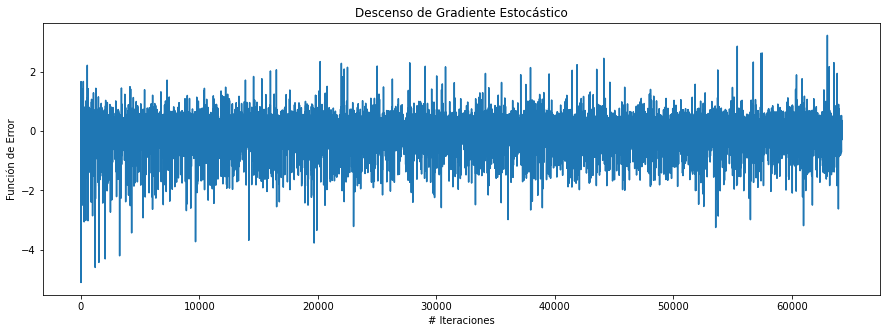

In [12]:
plt.figure(figsize=(15,5))
plt.plot(errores)
plt.xlabel('# Iteraciones')
plt.ylabel('Función de Error')
plt.title('Descenso de Gradiente Estocástico')

Text(0.5, 1.0, 'Descenso de Gradiente Estocástico')

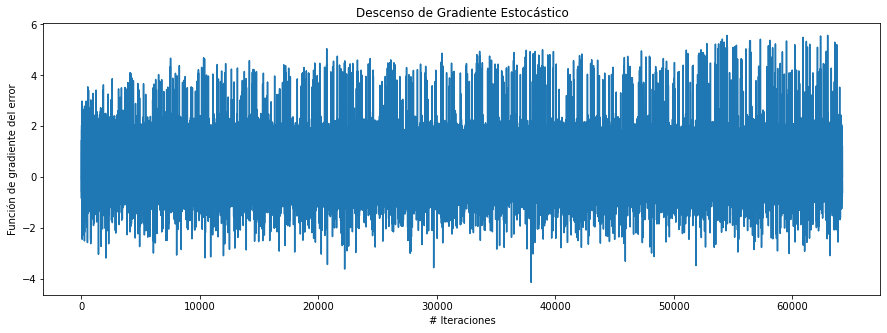

In [14]:
plt.figure(figsize=(15,5))
plt.plot(gs)
plt.xlabel('# Iteraciones')
plt.ylabel('Función de gradiente del error')
plt.title('Descenso de Gradiente Estocástico')

Text(0.5, 1.0, 'Descenso de Gradiente Estocástico')

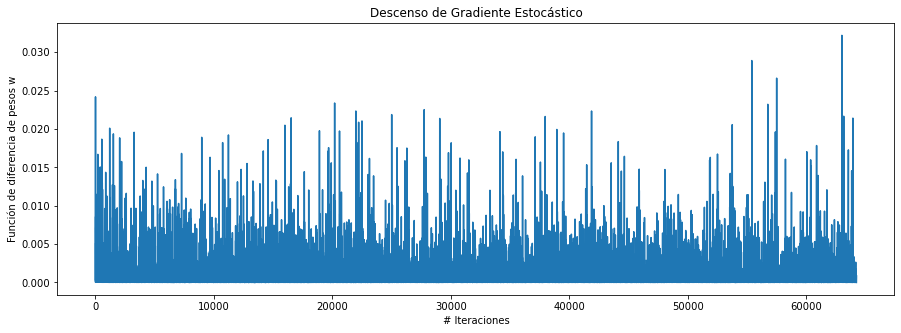

In [16]:
plt.figure(figsize=(15,5))
plt.plot(condits)
plt.xlabel('# Iteraciones')
plt.ylabel('Función de diferencia de pesos w')
plt.title('Descenso de Gradiente Estocástico')